In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
import sys
import string
import re
sys.path.append('../')
import pickle

In [2]:
df = pd.read_csv('../data/processed/selected_features_text_final.csv')

In [3]:
df.text


0          awww that bummer shoulda got david carr third day
1          upset cant updat facebook text might cri resul...
2            dive mani time ball manag save 50 rest go bound
3                            whole bodi feel itchi like fire
4                                      behav im mad cant see
                                 ...                        
1599995                           woke school best feel ever
1599996         thewdbcom cool hear old walt interview â  «
1599997                         readi mojo makeov ask detail
1599998    happi 38th birthday boo alll time tupac amaru ...
1599999                                 happi charitytuesday
Name: text, Length: 1600000, dtype: object

In [7]:
df.isna().sum()
# df['text'].to_csv('../data/processed/text.csv')

Unnamed: 0       0
text          6846
sentiment        0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.text

0          awww that bummer shoulda got david carr third day
1          upset cant updat facebook text might cri resul...
2            dive mani time ball manag save 50 rest go bound
3                            whole bodi feel itchi like fire
4                                      behav im mad cant see
                                 ...                        
1599995                           woke school best feel ever
1599996         thewdbcom cool hear old walt interview â  «
1599997                         readi mojo makeov ask detail
1599998    happi 38th birthday boo alll time tupac amaru ...
1599999                                 happi charitytuesday
Name: text, Length: 1593154, dtype: object

In [17]:
# df.text = df.text.apply(lambda x: 'empty' if (type(x) == float or x == np.nan) else x)

In [62]:
df.text[208]

'empty'

In [6]:
X = df['text']
y = df['sentiment']

In [7]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [10]:
tf = TfidfVectorizer(ngram_range= (1,2), max_features = 500000)
X_train = tf.fit_transform(X_train)
X_test = tf.transform(X_test)
# Time : ~

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
lr = LogisticRegression(solver = 'saga',penalty = 'elasticnet', max_iter = 500, l1_ratio=0.3)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [73]:
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

0.7958833333333334


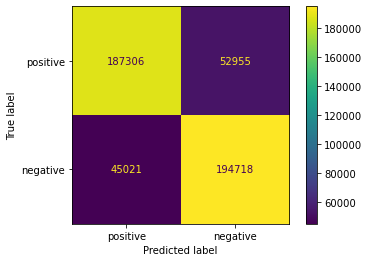

In [75]:
print(acc)
mat = ConfusionMatrixDisplay(conf_matrix, display_labels=['positive', 'negative'])
mat.plot()
sys.path.append('../')
# pickle.dump(xgb, open('../models/74-xgb.pkl', 'wb'))

In [ ]:
# pickle.dump(lr, open('../models/79_57_logreg.pkl', 'wb'))

In [11]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [12]:
# pickle.dump(mnb, open('../models/79_5-mnb(2).pkl', 'wb'))

0.7812121427689681


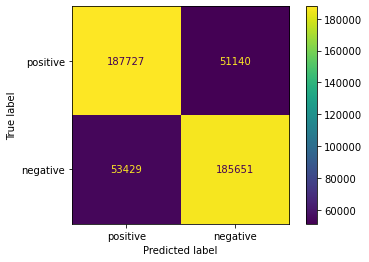

In [13]:
y_pred_mnb = mnb.predict(X_test)
acc = accuracy_score(y_test, y_pred_mnb)
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred_mnb)
mat = ConfusionMatrixDisplay(conf_matrix, display_labels=['positive', 'negative'])
mat.plot()

In [23]:
from sklearn.svm import SVC
# This Couldn't converge

In [24]:
# vm = SVC(kernel = 'linear')
# vm.fit(X_train, y_train)

In [ ]:
# y_pred_vm = mnb.predict(X_test)
# acc = accuracy_score(y_test, y_pred_vm)
# print(acc)
# conf_matrix = confusion_matrix(y_test, y_pred_mnb)
# mat = ConfusionMatrixDisplay(conf_matrix, display_labels=['positive', 'negative'])
# mat.plot()

In [ ]:
# sys.path.append('../')
# pickle.dump(xgb, open('../models/vm.pkl', 'wb'))

In [12]:
# from xgboost import XGBClassifier

In [13]:
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)

In [ ]:
# y_pred_xgb = xgb.predict(X_test)
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [ ]:
# sys.path.append('../')
# pickle.dump(xgb, open('../models/74-xgb.pkl', 'wb'))

From Built model

In [13]:
loaded_model = pickle.load(open('../models/79_57_logreg_final.pkl', 'rb'))
tf           = pickle.load(open('../models/tf_notebook.pkl', 'rb'))
# result = loaded_model.score(X_test, Y_test)

In [91]:
X_test = df['text'].sample(frac=0.2, random_state=42)
# X_test[8] = "not good idea"
X_test

528221             awwww kant make ill still ny glad your ok
277471     wish localadlink work properli steubenvil ohio...
1426728                                     tan beach hawaii
1405638                                          look comput
875697                     hi miley ok your amaz love r kiss
                                 ...                        
900627     hous sale go ok hope realli like daili paint t...
1164330    accord jÃ¯ Â¿ Â½ rg kachelmann itll start rain...
1554286    internet se cortÃ£ Â³ dejÃ£ Â³ de subirs el vi...
1357859          drama like thing work plu wanna see perform
1127331    watch hous listen mcmb still want salampvinega...
Name: text, Length: 318631, dtype: object

In [92]:
X_test = tf.transform(X_test)
y_test =df.sentiment.sample(frac=0.2, random_state=42)
y_test

528221     0
277471     0
1426728    4
1405638    4
875697     4
          ..
900627     4
1164330    4
1554286    4
1357859    4
1127331    4
Name: sentiment, Length: 318631, dtype: int64

In [93]:
y_pred_load = loaded_model.predict(X_test)
y_pred_loaded = loaded_model.predict(X_test)
acc = accuracy_score(y_test, y_pred_loaded)
acc

0.8264293179257511

In [94]:
y_pred_load

array([0, 0, 4, ..., 4, 0, 4])